<a href="https://colab.research.google.com/github/ZiiMceva/LLM_Class_Ziinat/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/thomaskonstantin/top-10000-anime-movies-ovas-and-tvshows")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ziinatm
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/thomaskonstantin/top-10000-anime-movies-ovas-and-tvshows


100%|██████████| 2.12M/2.12M [00:00<00:00, 704MB/s]

In [ ]:
import pandas as pd
data = pd.read_csv("/content/top-10000-anime-movies-ovas-and-tvshows/Anime_Top10000.csv")

In [ ]:
data

,Anime_Name,Anime_Episodes,Anime_Air_Years,Anime_Rating,Synopsis
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,9.18,"""In order for something to be obtained, someth..."
1,Shingeki no Kyojin Season 3 Part 2,TV (10 eps),Apr 2019 - Jul 2019,9.11,Seeking to restore humanity's diminishing hope...
2,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,9.11,The self-proclaimed mad scientist Rintarou Oka...
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,9.09,"Gintoki, Shinpachi, and Kagura return as the f..."
4,Hunter x Hunter (2011),TV (148 eps),Oct 2011 - Sep 2014,9.08,Hunter x Hunter is set in a world where Hunter...
...,...,...,...,...,...
9995,Animagear,ONA (1 eps),Jul 2019 - Jul 2019,5.43,Stop motion animation of aliens on a guided to...
9996,Cheating Craft,TV (12 eps),Oct 2016 - Dec 2016,5.43,A music video-style advertisement for Lotte's ...
9997,Circuit Angel: Ketsui no Starting Grid,OVA (1 eps),May 1987 - May 1987,5.43,Nobumasa is a boy who works part-time in a sho...
9998,Dengeki Oshioki Musume Gootaman R: Ai to Kanas...,OVA (1 eps),Oct 1994 - Oct 1994,5.43,Recap episodes of Ai Tenchi Muyou!


In [ ]:
# Extract metadata
Synopsis = data["Synopsis"]
Anime_Name = data["Anime_Name"]

1. Embedding Documents

In [ ]:
from sentence_transformers import SentenceTransformer
# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(Synopsis,show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(10000, 384)

2. Reducing the Dimensionality of Embeddings

In [ ]:
from umap import UMAP

# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


3. Cluster the Reduced Embeddings

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)


clusters = hdbscan_model.labels_

# How many clusters did we generate?
len(set(clusters))

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


9

Inspecting the Clusters

In [ ]:
import numpy as np

# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
    index=int(index)
    print(Synopsis[index][:300] + "... \n")

No synopsis information has been added to this title. Help improve our database by adding a synopsis here.... 

No synopsis information has been added to this title. Help improve our database by adding a synopsis here.... 

No synopsis information has been added to this title. Help improve our database by adding a synopsis here.... 



In [ ]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["Anime_Name"] = Anime_Name
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]  # Select clustered points
outliers_df = df.loc[df.cluster == "-1", :]   # Select outliers

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Static Plot

(np.float64(-16.322801113128662),
 np.float64(28.409125804901123),
 np.float64(-13.962402772903442),
 np.float64(27.081218194961547))

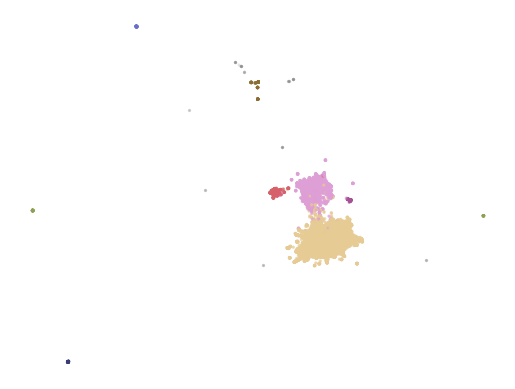

In [ ]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="gray")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')


From Text Clustering to Topic Modeling

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 8.4 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(Synopsis, embeddings)

2025-10-20 03:32:01,726 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-20 03:32:33,702 - BERTopic - Dimensionality - Completed ✓
2025-10-20 03:32:33,703 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-20 03:32:34,117 - BERTopic - Cluster - Completed ✓
2025-10-20 03:32:34,124 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-20 03:32:34,707 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,129,-1_releases_anime_week_here,"[releases, anime, week, here, read, north, ame...",[Here are the North American anime & manga rel...
1,0,6616,0_the_to_and_of,"[the, to, and, of, in, is, his, her, with, as]","[One day, Nobita finds a stray dog drowning in..."
2,1,2406,1_the_of_episode_series,"[the, of, episode, series, anime, and, on, in,...",[The official website for the currently airing...
3,2,458,2_music_video_song_for,"[music, video, song, for, the, by, album, anim...",[Music video for the song main actor by Minami...
4,3,117,3_synopsis_added_database_adding,"[synopsis, added, database, adding, improve, i...",[No synopsis information has been added to thi...
5,4,89,4_pokémon_pokemon_the_satoshi,"[pokémon, pokemon, the, satoshi, pikachu, and,...",[Pokemon are peculiar creatures with a vast ar...
6,5,66,5_releases_anime_north_american,"[releases, anime, north, american, week, here,...",[Here are the North American anime & manga rel...
7,6,64,6_videos_excludes_pvs_cms,"[videos, excludes, pvs, cms, ads, trailers, th...",[Here is a collection of promotional videos (P...
8,7,55,7_diving_strange_march_other,"[diving, strange, march, other, into, world, r...","[\nDiving into the Strange World of ""Source: O..."


In [ ]:
topic_model.get_topic(0)

[('the', np.float64(0.06442458119368077)),
 ('to', np.float64(0.05014927627395328)),
 ('and', np.float64(0.046700135443597295)),
 ('of', np.float64(0.04435201397249762)),
 ('in', np.float64(0.033676272989590285)),
 ('is', np.float64(0.03306915634825778)),
 ('his', np.float64(0.028720391913658168)),
 ('her', np.float64(0.025635097685489414)),
 ('with', np.float64(0.02541314464046675)),
 ('as', np.float64(0.023155832034778754))]

In [ ]:
# Visualize topics and documents

titles = list(data["Anime_Name"])
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [ ]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [ ]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

In [ ]:
# KeyBERTInspired

from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(Synopsis, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,0,the | to | and | of | in,story | mysterious | mal | written | them
1,1,the | of | episode | series | anime,anime | manga | aired | episodes | released
2,2,music | video | song | for | the,video | videos | youtube | footage | song
3,3,synopsis | added | database | adding | improve,synopsis | | | |
4,4,pokémon | pokemon | the | satoshi | pikachu,pokemon | pokémon | pikachu | mewtwo | arceus


In [ ]:
## Maximal marginal relevance

from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(Synopsis, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,0,the | to | and | of | in,to | of | her | by | their
1,1,the | of | episode | series | anime,anime | dvd | read | will | episodes
2,2,music | video | song | for | the,video | by | animated | band | miku
3,3,synopsis | added | database | adding | improve,synopsis | database | adding | improve | title
4,4,pokémon | pokemon | the | satoshi | pikachu,pokémon | satoshi | pikachu | of | friends


In [ ]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is this topic about?"""

# Update our topic representations using Flan-T5
generator = pipeline('text2text-generation', model='google/flan-t5-small')
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)
topic_model.update_topics(Synopsis, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

Device set to use cuda:0
100%|██████████| 9/9 [00:25<00:00,  2.83s/it]


,Topic,Original,Updated
0,0,the | to | and | of | in,Akari Taiyou | | | |
1,1,the | of | episode | series | anime,anime | | | |
2,2,music | video | song | for | the,music | | | |
3,3,synopsis | added | database | adding | improve,Science/Tech | | | |
4,4,pokémon | pokemon | the | satoshi | pikachu,Pokémon | | | |
